In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import math 
import os

In [80]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [41]:


# Check if the chromosome names and lengths are the same in both files
if vcf_file.references != fasta_file.references:
    print("Error: chromosome names in VCF file do not match chromosome names in FASTA file")
    exit()
if vcf_file.header.contigs != fasta_file.lengths:
    print("Error: chromosome lengths in VCF file do not match chromosome lengths in FASTA file")
    exit()

# Get the genomic coordinates for chromosome 1
chromosome_name = "Chr1"
chromosome_length = fasta_file.get_reference_length(chromosome_name)
vcf_positions = set()
for record in vcf_file.fetch(chromosome_name, 0, chromosome_length):
    vcf_positions.add(record.pos)
fasta_positions = set(range(0, chromosome_length))

# Check if the VCF and FASTA files cover the same positions for chromosome 1
if vcf_positions != fasta_positions:
    print("Error: VCF and FASTA files do not cover the same positions for chromosome 1")
    exit()

print("VCF and FASTA files cover the same positions for chromosome 1")


AttributeError: 'pysam.libcbcf.VariantFile' object has no attribute 'references'

In [2]:
## testing the api from 1001 genome project
import requests
url = 'https://tools.1001genomes.org/api/v1/vcfsubset/strains/9998,9999/gids/AT1G01070.1,AT1G01070.2/type/fullgenome/format/vcf'


In [3]:
req = requests.get(url)

In [6]:
req.headers

{'Date': 'Wed, 08 Mar 2023 18:00:36 GMT', 'Server': 'Apache/2.4.29 (Ubuntu)', 'Access-Control-Allow-Origin': '*', 'Content-Disposition': 'attachment; filename="9998,9999_1:38752-40944,1:38752-40927_fullgenome.vcf"', 'Strict-Transport-Security': 'max-age=15552000; includeSubdomains;', 'Vary': 'User-Agent', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Transfer-Encoding': 'chunked', 'Content-Type': 'text/x-vcard; charset=utf-8'}

In [7]:
open('test.txt', 'wb').write(req.content)

278139

In [106]:
ecotypes_grenenet = pd.read_csv('/Users/tbellagio/safedata/ath_evo/grenephase1/data/ecotypes_data.csv')

In [107]:
ecotypes_grenenet = ecotypes_grenenet[ecotypes_grenenet['source'] == '1001G']

In [73]:
##find the ecotypes used in grenenet 
ecotypes_grenenet = pd.read_csv('/Users/tbellagio/safedata/ath_evo/grenephase1/data/ecotypes_data.csv') #['ecotypeid']
ecotypes_grenenet = ecotypes_grenenet[ecotypes_grenenet['source'] == '1001G']['ecotypeid']
#/Users/tbellagio/safedata/ath_evo/grenephase1/data

In [109]:
ecotypes_grenenet

,ecotypeid,source,longitude,latitude,csnumber,name,country,weightmasterseed,estimatedseednumber,seedsperplot
0,159,1001G,3.93333,47.3500,CS77070,MAR2-3,France,0.3004,16638,17.331250
1,265,1001G,-1.16667,44.6500,CS77198,PYL-6,France,0.3250,18000,18.750000
2,763,1001G,74.36670,42.3000,CS76522,Kar-1,Kyrgyzstan,0.1827,10119,10.540625
3,765,1001G,73.40000,42.1833,CS76607,Sus-1,Kyrgyzstan,0.2994,16582,17.272917
4,766,1001G,73.63330,42.5833,CS76473,Dja-1,Kyrgyzstan,0.3004,16638,17.331250
...,...,...,...,...,...,...,...,...,...,...
224,10002,1001G,9.04000,48.5300,CS76405,TueWa1-2,Germany,0.2338,12949,13.488542
225,10006,1001G,34.38140,44.6419,CS76395,Kastel-1,Ukraine,0.3075,17031,17.740625
226,10011,1001G,45.36220,39.8692,CS76394,Yeg-1,Armenia,0.0489,2708,2.820833
227,10013,1001G,48.61310,38.7406,CS76388,Lerik1-3,Azerbaijan,0.1704,9438,9.831250


In [110]:
ecotypes_grenenet = ecotypes_grenenet['ecotypeid'].tolist()

In [113]:
with open('ecotypes_grenenet.txt', 'w') as file:
    file.write('\n'.join(str(ecotypes) for ecotypes in ecotypes_grenenet))
    

In [50]:
ecotypes = str(lines).replace('[\'', '').replace('\']', '').replace(' ', '')


In [55]:
type(ecotypes)

str

In [57]:
ecotypes.replace(' ', '')

'159,265,763,765,766,768,772,5151,5165,5768,5772,5784,5811,6013,6025,6040,6073,6074,6108,6150,6177,6180,6184,6188,6195,6209,6216,6243,6244,6898,6911,6915,6929,6932,6938,6939,6940,6945,6958,6961,6963,6979,6987,7000,7002,7003,7008,7013,7025,7028,7031,7036,7062,7063,7067,7071,7077,7092,7103,7106,7125,7126,7127,7143,7164,7165,7186,7203,7209,7217,7218,7244,7255,7268,7273,7276,7282,7287,7288,7296,7298,7316,7323,7333,7346,7347,7353,7372,7378,7384,7394,7404,7411,7521,8214,8230,8231,8240,8247,8249,8311,8312,8351,8354,8357,8376,8387,9057,9058,9323,9371,9394,9416,9427,9470,9481,9506,9507,9510,9512,9517,9518,9521,9522,9523,9524,9526,9527,9528,9529,9534,9535,9537,9539,9542,9544,9547,9548,9549,9555,9557,9559,9560,9562,9564,9565,9574,9577,9579,9584,9586,9587,9591,9594,9595,9596,9597,9598,9600,9602,9606,9612,9619,9625,9629,9632,9634,9637,9640,9643,9649,9653,9657,9659,9697,9698,9699,9713,9716,9719,9723,9726,9736,9737,9739,9741,9743,9748,9749,9758,9759,9761,9764,9766,9769,9774,9775,9779,9781,9782,9784,9

In [90]:
len(pd.read_csv('ecotpyes_cluster_vcf.txt', sep= '/n'))

/var/folders/c7/0sb823gx22x79fkn0_lcmmqw0000gn/T/ipykernel_97014/1215055019.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  len(pd.read_csv('ecotpyes_cluster_vcf.txt', sep= '/n'))


1134

In [ ]:
import allel


In [178]:
#vcf.keys()
vcf = allel.read_vcf('outputs/subp0.vcf', samples=['i0'])
gt = vcf['calldata/GT']
ref = vcf['variants/REF']
alt = vcf['variants/ALT']

## checking that all the values in the second column are empty 
np.all(alt[:, 1] == '')
## checking that all the values in the third column are empty 
np.all(alt[:, 2] == '')
## so i will only keep the ones in the first column 
alt = alt[:, 0] 
first_chr = gt[:, 0, 0]
second_chr = gt[:, 0, 1]

# Retrieve the reference sequence for the genomic region covered by the VCF file
chrom = vcf['variants/CHROM'][0]
start = vcf['variants/POS'][0]
end = vcf['variants/POS'][-1]
# Convert the genotype information to a nucleotide sequence
seq_firstchr = ''
for i in range(0, len(first_chr)):
    if first_chr[i] == 0:
        seq_firstchr += ref[i]
    else:
        seq_firstchr += alt[i]
seq_firstchr
with open(f'{sample}.fasta', 'w') as f:
    f.write(f'>{chrom}:{start}-{end}\n')
    f.write(seq_firstchr + '\n')


In [ ]:
## make a loop to create a fasta file for all the individuals in one population

In [316]:
vcf = allel.read_vcf('vcf_slim/subp0.vcf')

In [318]:
samples = vcf['samples']

In [330]:
#vcf.keys()
## will just do it for 20 
for individual in samples[:20]: 
    print(individual)
    vcf = allel.read_vcf('vcf_slim/subp0.vcf', samples=[individual])
    gt = vcf['calldata/GT']
    ref = vcf['variants/REF']
    alt = vcf['variants/ALT']

    ## i will only keep the ones in the first column for the alt 
    alt = alt[:, 0] 
    first_chr = gt[:, 0, 0]
    second_chr = gt[:, 0, 1]

    # Retrieve the reference sequence for the genomic region covered by the VCF file

    ## here i will have to pretend that each organisms is a chromosome 
    #chrom = vcf['variants/CHROM'][0]
    start = vcf['variants/POS'][0]
    end = vcf['variants/POS'][-1]
    # Convert the genotype information to a nucleotide sequence
    seq_firstchr = ''
    for i in range(0, len(first_chr)):
        if first_chr[i] == 0:
            seq_firstchr += ref[i]
        else:
            seq_firstchr += alt[i]
    seq_firstchr
    with open(f'vcf_slim/fasta_slim/subp0.fasta', 'a') as f:
        f.write(f'>{individual}:{start}-{end}\n')
        f.write(seq_firstchr + '\n')

i0
i1
i2
i3
i4
i5
i6
i7
i8
i9
i10
i11
i12
i13
i14
i15
i16
i17
i18
i19


In [312]:
## find heterocygous sites with scikit allele

In [313]:
callset = allel.read_vcf('outputs/subp0.vcf') #, samples=['i0'])

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/subp0.vcf'

In [ ]:

# Get genotype array
gt = allel.GenotypeArray(callset['calldata/GT'])


In [ ]:
gt.is_het()


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
## number of heterozigous per position in my simulation 
len(gt.count_het(axis=1))
het_per_pos = gt.count_het(axis=1)

<AxesSubplot:ylabel='Count'>

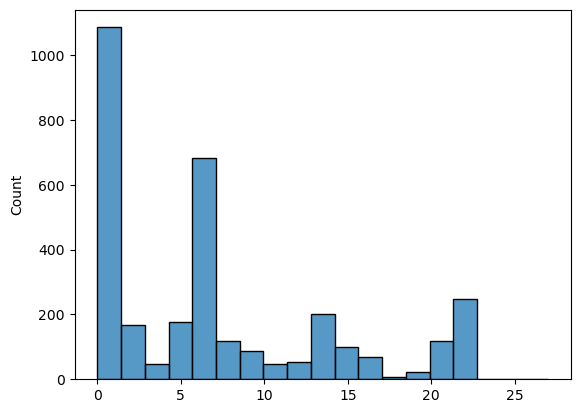

In [ ]:
sns.histplot(het_per_pos)

In [333]:
### how to relate the fitness and the number of offspring 


from scipy.stats import poisson

#generate random values from Poisson distribution with mean=3 and sample size=10
v = poisson.rvs(mu=2, size=1)

In [354]:
fitness = np.array(fitness)

In [356]:
fitness * 10

array([12.6966 , 10.6575 , 10.0849 , 14.9224 ,  7.79436, 16.1183 ,
       14.5854 , 12.1587 , 13.5396 , 12.258  , 11.8517 , 13.1451 ,
       11.5364 , 13.3351 , 11.1018 , 11.2782 , 12.6917 , 18.8412 ,
       10.6595 , 12.3677 , 10.1509 , 11.3001 , 12.6499 ,  9.05024,
       11.1095 , 10.5936 , 12.109  , 12.5418 , 11.5789 , 11.4319 ,
       13.3566 , 13.9941 , 12.6608 , 18.8412 , 15.1431 , 11.5578 ,
       13.5802 , 11.5743 , 11.4843 , 11.7558 , 11.4587 , 11.347  ,
       14.103  , 12.3669 , 10.7956 ,  8.08025, 10.4121 , 14.403  ,
       18.2383 , 12.4161 , 11.6155 , 10.3975 , 13.1357 , 10.9732 ,
       11.7638 , 14.4976 ,  8.23244, 10.392  , 16.1054 , 14.2423 ,
        9.64468, 11.3949 , 14.0501 , 14.403  , 11.5897 , 16.697  ,
       12.5442 , 12.7203 , 17.7736 , 12.7009 , 12.5301 , 13.0964 ,
       12.358  ,  7.38602, 16.6074 , 12.0858 , 11.1043 , 12.1324 ,
       11.7557 , 12.6746 , 13.0154 , 14.0475 , 11.61   , 14.4674 ,
       11.7629 , 10.3121 , 12.2055 , 17.5894 , 14.7515 , 13.53

In [358]:
np.ones(len(fitness))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [634]:
## get the total number of position in the vcf file that i am working with, so then i can calculate the selection coefficients 
import allel

# Load VCF file
## be careful remember this file has multiplied samples
vcf = allel.read_vcf('qtl1_contrib.vcf')
numer_pos = len(vcf['variants/POS'])
## so now im gonna sample that nubmer of elements from a normal dist
mu, sigma = 0,1 # mean and standard deviation
selection_coef = np.random.normal(mu, sigma, numer_pos)
selection_coef = np.round(selection_coef, 4)

In [295]:
selection_coef

0      0.2017
1     -0.3735
2      0.3970
3     -0.5890
4      0.7166
        ...  
191   -0.1045
192    0.0458
193    0.5098
194   -0.5903
195   -0.8309
Name: 3, Length: 196, dtype: float64

<AxesSubplot:xlabel='3', ylabel='Count'>

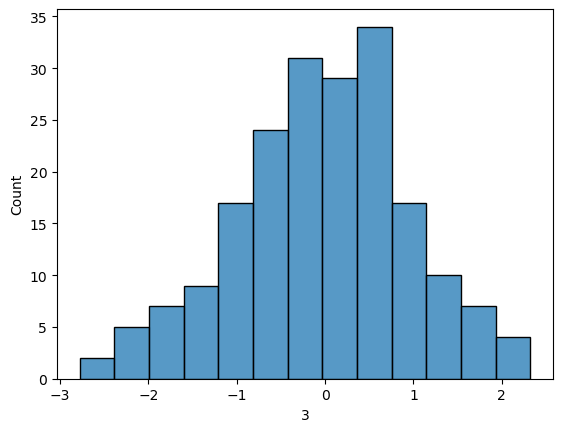

In [296]:
sns.histplot(selection_coef)

Creating a bed file with python to then pass the seelction coeff to the vcf file

In [636]:
positions = vcf['variants/POS'].tolist()

In [637]:
## to caluclate the positions FROM in a bed file, the fist value is not included
positions_from = [i-1 for i in positions]


In [638]:
len(positions_to)

8

In [639]:
# Define the positions and values
chromosome = [1] * numer_pos

# Create a DataFrame from the positions and values
df = pd.DataFrame({'chromosome':chromosome,'positions_from': positions_from, 'positions_to': positions, 'selection_coef': selection_coef})

# Write the DataFrame to a BED file
df.to_csv('selection_coef_qtl1_contrib.bed', sep='\t', header=False, index=False)

# Optionally, print the contents of the BED file
with open('selection_coef_qtl1_contrib.bed', 'r') as f:
    print(f.read())

1	113622	113623	0.2017
1	472938	472939	-0.3735
1	511705	511706	0.397
1	512914	512915	-0.589
1	620145	620146	0.7166
1	710571	710572	-2.2538
1	1234969	1234970	-0.2619
1	1302315	1302316	0.8618
1	1492466	1492467	-0.0941
1	1549958	1549959	-0.6387
1	1830310	1830311	2.0952
1	2159338	2159339	1.4298
1	2310518	2310519	0.2462
1	2834440	2834441	-0.9065
1	3115161	3115162	-0.077
1	3259107	3259108	-2.3857
1	3542381	3542382	-0.7013
1	3598548	3598549	-0.399
1	3708166	3708167	0.2623
1	3714043	3714044	-1.6592
1	4493843	4493844	0.6248
1	4783476	4783477	-0.7235
1	4860479	4860480	-1.029
1	4949999	4950000	0.5296
1	4995118	4995119	-1.4906
1	5211612	5211613	0.4941
1	5264797	5264798	1.3707
1	5415373	5415374	-0.5102
1	5511624	5511625	-0.1463
1	5571784	5571785	0.1358
1	5692165	5692166	1.742
1	6004231	6004232	0.5497
1	6060651	6060652	-1.4206
1	6346977	6346978	-1.5826
1	6733595	6733596	0.454
1	6775952	6775953	2.3251
1	6867336	6867337	-1.0893
1	7581017	7581018	-1.1878
1	7943768	7943769	1.7754
1	7966286	7966287	1.514

In [110]:
with open('selection_coef_qtl1_contrib.bed', 'r') as f:
    print(f.read())

1	113622	113623	0.2017
1	472938	472939	-0.3735
1	511705	511706	0.397
1	512914	512915	-0.589
1	620145	620146	0.7166
1	710571	710572	-2.2538
1	1234969	1234970	-0.2619
1	1302315	1302316	0.8618
1	1492466	1492467	-0.0941
1	1549958	1549959	-0.6387
1	1830310	1830311	2.0952
1	2159338	2159339	1.4298
1	2310518	2310519	0.2462
1	2834440	2834441	-0.9065
1	3115161	3115162	-0.077
1	3259107	3259108	-2.3857
1	3542381	3542382	-0.7013
1	3598548	3598549	-0.399
1	3708166	3708167	0.2623
1	3714043	3714044	-1.6592
1	4493843	4493844	0.6248
1	4783476	4783477	-0.7235
1	4860479	4860480	-1.029
1	4949999	4950000	0.5296
1	4995118	4995119	-1.4906
1	5211612	5211613	0.4941
1	5264797	5264798	1.3707
1	5415373	5415374	-0.5102
1	5511624	5511625	-0.1463
1	5571784	5571785	0.1358
1	5692165	5692166	1.742
1	6004231	6004232	0.5497
1	6060651	6060652	-1.4206
1	6346977	6346978	-1.5826
1	6733595	6733596	0.454
1	6775952	6775953	2.3251
1	6867336	6867337	-1.0893
1	7581017	7581018	-1.1878
1	7943768	7943769	1.7754
1	7966286	7966287	1.514

In [5]:
#### calculate the optima under the assumption of local adaptation 

In [21]:
ecotypes_temp = pd.read_csv('/Users/tbellagio/safedata/ath_evo/grenephase1/data/worldclim_ecotypesdata.csv', usecols=['ecotypeid', 'bio1'])

In [85]:
#BIO1 = Annual Mean Temperature
## filter by hte ones coming from the 1001 genomes
ecotypes_temp = ecotypes_temp[ecotypes_temp['ecotypeid'].isin(samples_original)]

In [86]:
## get the total number of position in the vcf file that i am working with, so then i can calculate the selection coefficients 
import allel

# Load VCF file
## be careful remember this file has multiplied samples
vcf = allel.read_vcf('qtl1_contrib.vcf')

In [87]:
samples = vcf['samples'].astype(str)
symbol_indices = np.char.find(samples, ':')
samples_original = samples[symbol_indices == -1]

In [88]:
samples_original

array(['159', '265', '763', '765', '766', '768', '772', '5151', '5165',
       '5768', '5772', '5784', '5811', '6013', '6025', '6040', '6073',
       '6074', '6108', '6150', '6177', '6180', '6184', '6188', '6195',
       '6209', '6216', '6243', '6244', '6898', '6911', '6915', '6929',
       '6932', '6938', '6940', '6945', '6958', '6961', '6963', '6979',
       '6987', '7000', '7002', '7003', '7008', '7013', '7025', '7028',
       '7031', '7036', '7062', '7063', '7067', '7071', '7077', '7092',
       '7103', '7106', '7125', '7126', '7127', '7143', '7164', '7165',
       '7186', '7203', '7209', '7217', '7218', '7244', '7255', '7268',
       '7273', '7276', '7282', '7287', '7288', '7296', '7298', '7316',
       '7323', '7333', '7346', '7347', '7353', '7372', '7378', '7384',
       '7394', '7404', '7411', '7521', '8214', '8230', '8231', '8240',
       '8247', '8249', '8311', '8312', '8351', '8354', '8357', '8376',
       '8387', '9057', '9058', '9323', '9371', '9394', '9416', '9427',
     

In [89]:
ecotypes_temp['ecotypeid'] = ecotypes_temp['ecotypeid'].astype(str)

/var/folders/c7/0sb823gx22x79fkn0_lcmmqw0000gn/T/ipykernel_4304/927789914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecotypes_temp['ecotypeid'] = ecotypes_temp['ecotypeid'].astype(str)


In [90]:
ecotypes_temp_filtered = ecotypes_temp[ecotypes_temp['ecotypeid'].isin(samples_original)]

<AxesSubplot:xlabel='bio1', ylabel='Count'>

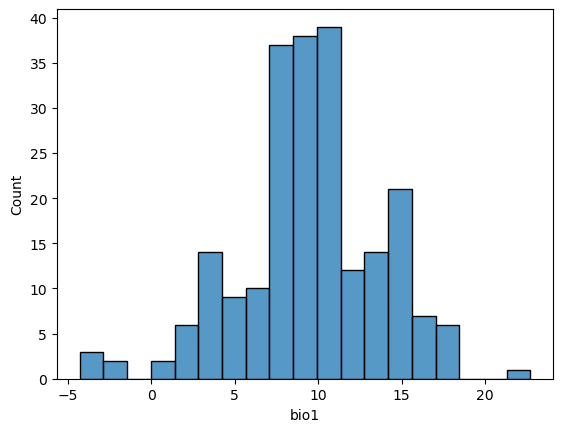

In [91]:
sns.histplot(ecotypes_temp_filtered['bio1'])

In [92]:
max_t = ecotypes_temp_filtered['bio1'].max()
min_t = ecotypes_temp_filtered['bio1'].min()

In [93]:
samples = pd.DataFrame(columns = ecotypes_temp_filtered.columns)

num_ranges = 5

# calculate the range width
range_width = (max_t - min_t) / num_ranges

# create the ranges
ranges = [(min_t + i*range_width, min_t + (i+1)*range_width) for i in range(num_ranges)]

# sample across the ranges
for r in ranges:
    r_ages = ecotypes_temp_filtered[( ecotypes_temp_filtered['bio1'] >= r[0]) & ( ecotypes_temp_filtered['bio1'] < r[1])]
    samples = pd.concat([samples, r_ages.sample(3)])
## and then to complete i will duplicate one 
samples = pd.concat([samples, samples.sample(1)])

In [94]:
samples['ecotypeid']

5       768
80     7298
4       766
165    9632
34     6938
113    9427
31     6915
127    9527
98     8247
118    9510
170    9649
121    9518
53     7063
30     6911
216    9944
5       768
Name: ecotypeid, dtype: object

Here I will calculate the optima based on the snps of the ecotypes selected based on a range of temperatures 

In [95]:
import allel

# Load VCF file
## be careful remember this file has multiplied samples
vcf = allel.read_vcf('qtl1_contrib.vcf')

#samples = vcf['samples'].astype(str)
#symbol_indices = np.char.find(samples, ':')
#samples_original = samples[symbol_indices == -1]

## now getting the filtered vcf file with one cotype each time 
#vcf = allel.read_vcf('qtl1_contrib.vcf', samples=samples_original)

In [ ]:
## sanity ceck i should not see any heteroc variants
#allel.GenotypeArray(vcf['calldata/GT']).is_het().sum(axis=1)

## mhmhm im seeing some heterocygos positions 

In [ ]:
#alt_al_per_ecotype = allel.GenotypeArray(vcf['calldata/GT']).sum(axis=0).sum(axis=1)
#alt_al_per_ecotype  ## so they actually all have some alterantive allele at the selected positions
## that are contributing to the qtl 

In [ ]:
## im going to create 16 optima ecotypes

In [124]:
samples

dtype('O')

In [21]:
selection_coef = pd.read_csv('selection_coef_qtl1_contrib.bed', sep = '\t',header = None)[3]

In [ ]:
import allel

# Load VCF file
## be careful remember this file has multiplied samples
vcf = allel.read_vcf('qtl1_contrib.vcf')

In [125]:
phenotypes = []
for ecotype in samples['ecotypeid']:
    print(ecotype)
    vcf_ecotype = allel.read_vcf('qtl1_contrib.vcf', samples=[ecotype])
    ## for each position this is the number of alterantive variants 
    alt_alleles_per_pos = vcf_ecotype['calldata/GT'].sum(axis=2)
    gen_effectsize = np.multiply(alt_alleles_per_pos.flatten(), np.array(selection_coef))  ## select coef are actually effect sizes
    phenotypes.append(gen_effectsize.sum())
samples['phenotype'] = phenotypes

768
7298
766
9632
6938
9427
6915
9527
8247
9510
9649
9518
7063
6911
9944
768


In [126]:
samples

,ecotypeid,bio1,phenotype
5,768,0.716667,2.4774
80,7298,-3.270833,4.8818
4,766,-4.283333,1.5098
165,9632,2.662500,1.6925
34,6938,5.375000,-4.8774
113,9427,3.720833,-0.1210
31,6915,7.525000,-4.6118
127,9527,10.491667,-4.2956
98,8247,7.050000,-0.2480
118,9510,14.729167,4.4198


In [135]:
samples['phenotype'] = samples['phenotype'].round(3)  ## that are optima 

In [136]:
with open("optima.txt", "w") as f:
    for item in samples['phenotype']:
        f.write("%s\n" % item)

<AxesSubplot:xlabel='3', ylabel='Count'>

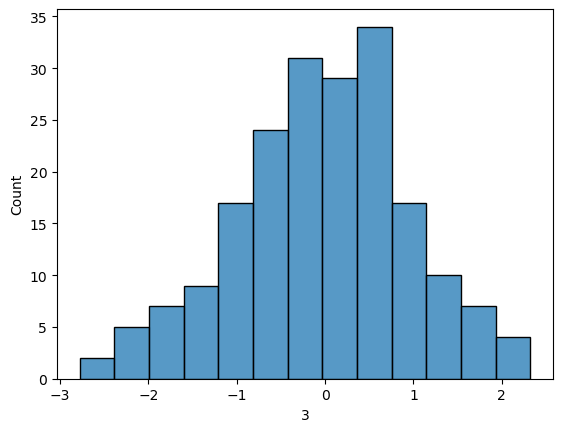

In [130]:
sns.histplot(selection_coef)

<AxesSubplot:xlabel='phenotype', ylabel='Count'>

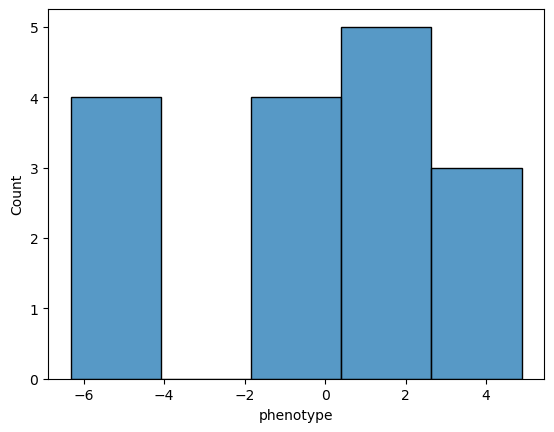

In [132]:
sns.histplot(samples['phenotype'])  ##optima

I am gonna take a look at the census data to determine kind of what is the max popualtion size that i see in the different places 

In [142]:
census_data = pd.read_csv('/Users/tbellagio/safedata/ath_evo/grenephase1/data/census_data.csv')

In [143]:
census_data

,site,plot,date,diagonalplantnumber,offdiagonalplantnumber,totalplantnumber,meanfruitsperplant,sdfruitsperplant,comments,censusid
0,55,1.0,2022-04-12,NaN,NaN,0.0,NaN,NaN,NaN,55012022-04-12
1,55,2.0,2022-04-12,NaN,NaN,1.0,NaN,NaN,NaN,55022022-04-12
2,55,3.0,2022-04-12,NaN,NaN,0.0,NaN,NaN,NaN,55032022-04-12
3,55,4.0,2022-04-12,NaN,NaN,2.0,NaN,NaN,NaN,55042022-04-12
4,55,5.0,2022-04-12,NaN,NaN,2.0,NaN,NaN,NaN,55052022-04-12
...,...,...,...,...,...,...,...,...,...,...
1185,57,6.0,2018-04-11,?,?,45.0,NaN,NaN,Plot_ID numbers may seem weird because other n...,57062018-04-11
1186,57,7.0,2018-04-11,?,?,63.0,NaN,NaN,Plot_ID numbers may seem weird because other n...,57072018-04-11
1187,57,9.0,2018-04-11,?,?,169.0,NaN,NaN,Plot_ID numbers may seem weird because other n...,57092018-04-11
1188,33,1.0,2018-06-07,NaN,NaN,1.0,NaN,NaN,NaN,33012018-06-07


In [154]:
census_data.dtypes

site                               int64
plot                             float64
date                      datetime64[ns]
diagonalplantnumber               object
offdiagonalplantnumber            object
totalplantnumber                  object
meanfruitsperplant               float64
sdfruitsperplant                 float64
comments                          object
censusid                          object
dtype: object

In [191]:
census_data['date'] = pd.to_datetime(census_data['date'])

In [197]:
census_data['date'].dt.year.astype(str).str[:4]

0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
1185    2018
1186    2018
1187    2018
1188    2018
1189    2018
Name: date, Length: 1190, dtype: object

In [198]:
census_data['year'] = census_data['date'].dt.year.astype(str).str[:4]

In [171]:
census_data= census_data.replace('more than 20', 20)
census_data= census_data.replace('>100',100)

census_data= census_data.replace('?', np.nan)
census_data= census_data.replace('many but probably not A. thaliana', np.nan)
census_data= census_data.replace('* total number of plants was impossible to assess as there are a lot of very small, purplish rosettes that aggregate together which makes it impossible to count.', np.nan)


In [175]:
census_data['totalplantnumber'] = census_data['totalplantnumber'].astype(float)

In [174]:
census_data['meanfruitsperplant'] = census_data['meanfruitsperplant'].astype(float)

In [177]:
census_data['diagonalplantnumber'] = census_data['diagonalplantnumber'].astype(float)

In [179]:
census_data['offdiagonalplantnumber'] = census_data['offdiagonalplantnumber'].astype(float)

<AxesSubplot:>

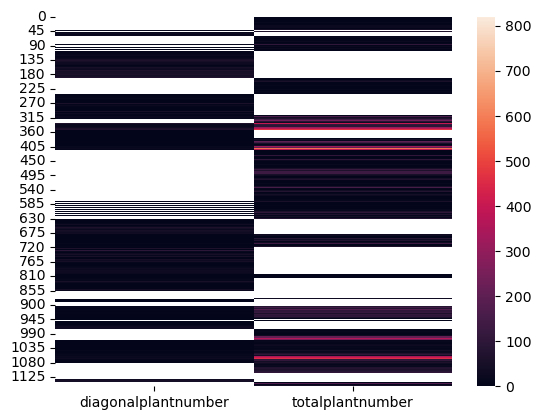

In [257]:
## it seems like some o them chose to do one meassurment or the other 

sns.heatmap(census_data[['diagonalplantnumber',
       'totalplantnumber', ]])

In [200]:
# im gonna delete this for now, there is a problem with site 48 year 2021 
census_data = census_data.drop(census_data[census_data['year']== 'nan'].index)

,site,plot,date,diagonalplantnumber,offdiagonalplantnumber,totalplantnumber,meanfruitsperplant,sdfruitsperplant,comments,censusid,year
0,55,1.0,2022-04-12,NaN,NaN,0.0,NaN,NaN,NaN,55012022-04-12,2022
1,55,2.0,2022-04-12,NaN,NaN,1.0,NaN,NaN,NaN,55022022-04-12,2022
2,55,3.0,2022-04-12,NaN,NaN,0.0,NaN,NaN,NaN,55032022-04-12,2022
3,55,4.0,2022-04-12,NaN,NaN,2.0,NaN,NaN,NaN,55042022-04-12,2022
4,55,5.0,2022-04-12,NaN,NaN,2.0,NaN,NaN,NaN,55052022-04-12,2022
...,...,...,...,...,...,...,...,...,...,...,...
1185,57,6.0,2018-04-11,NaN,NaN,45.0,NaN,NaN,Plot_ID numbers may seem weird because other n...,57062018-04-11,2018
1186,57,7.0,2018-04-11,NaN,NaN,63.0,NaN,NaN,Plot_ID numbers may seem weird because other n...,57072018-04-11,2018
1187,57,9.0,2018-04-11,NaN,NaN,169.0,NaN,NaN,Plot_ID numbers may seem weird because other n...,57092018-04-11,2018
1188,33,1.0,2018-06-07,NaN,NaN,1.0,NaN,NaN,NaN,33012018-06-07,2018


<AxesSubplot:xlabel='diagonalplantnumber', ylabel='Count'>

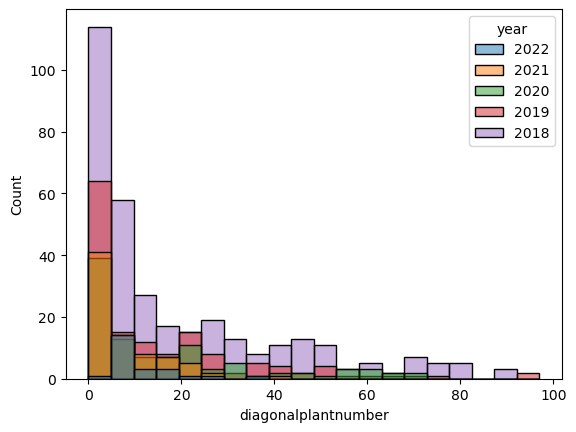

In [207]:
sns.histplot(data = census_data, x = 'diagonalplantnumber' , hue = 'year')

<AxesSubplot:xlabel='diagonalplantnumber', ylabel='Count'>

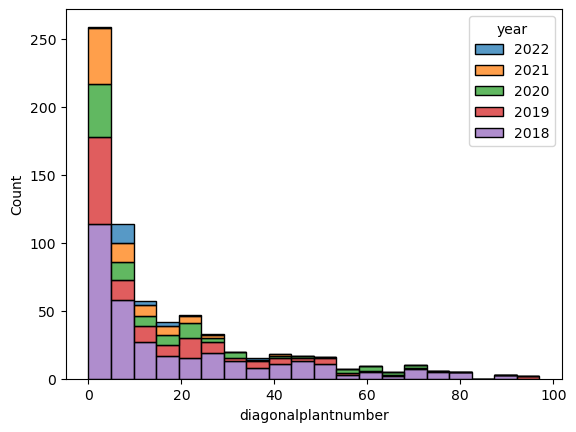

In [209]:
sns.histplot(data = census_data, x = 'diagonalplantnumber',  hue = 'year', multiple="stack")

<AxesSubplot:xlabel='diagonalplantnumber', ylabel='Count'>

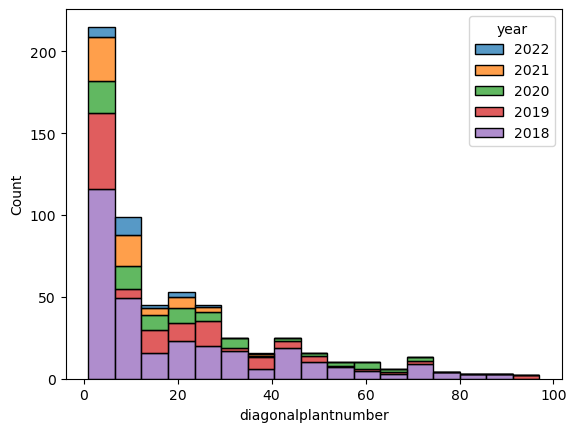

In [212]:
sns.histplot(data = census_data[census_data['diagonalplantnumber'] > 0 ], x = 'diagonalplantnumber',  hue = 'year', multiple="stack")

In [206]:
# im gonna delete this for now 
census_data = census_data.drop(census_data[census_data['year']== 'nan'].index)

<AxesSubplot:xlabel='totalplantnumber', ylabel='Count'>

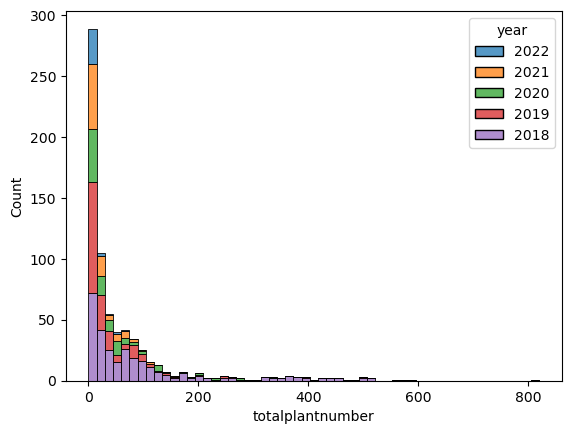

In [214]:
sns.histplot(data = census_data, x = 'totalplantnumber' , hue = 'year',multiple="stack")

In [220]:
sites_wc = pd.read_csv('/Users/tbellagio/safedata/ath_evo/grenephase1/data/worldclim_sitesdata.csv', usecols=['site', 'bio1'])

In [223]:
census_data = census_data.merge(sites_wc)

In [224]:
census_data

,site,plot,date,diagonalplantnumber,offdiagonalplantnumber,totalplantnumber,meanfruitsperplant,sdfruitsperplant,comments,censusid,year,bio1
0,55,1.0,2022-04-12,NaN,NaN,0.0,NaN,NaN,NaN,55012022-04-12,2022,8.933333
1,55,2.0,2022-04-12,NaN,NaN,1.0,NaN,NaN,NaN,55022022-04-12,2022,8.933333
2,55,3.0,2022-04-12,NaN,NaN,0.0,NaN,NaN,NaN,55032022-04-12,2022,8.933333
3,55,4.0,2022-04-12,NaN,NaN,2.0,NaN,NaN,NaN,55042022-04-12,2022,8.933333
4,55,5.0,2022-04-12,NaN,NaN,2.0,NaN,NaN,NaN,55052022-04-12,2022,8.933333
...,...,...,...,...,...,...,...,...,...,...,...,...
1149,57,3.0,2018-04-11,NaN,NaN,17.0,NaN,NaN,Plot_ID numbers may seem weird because other n...,57032018-04-11,2018,9.758333
1150,57,4.0,2018-04-11,NaN,NaN,18.0,NaN,NaN,Plot_ID numbers may seem weird because other n...,57042018-04-11,2018,9.758333
1151,57,6.0,2018-04-11,NaN,NaN,45.0,NaN,NaN,Plot_ID numbers may seem weird because other n...,57062018-04-11,2018,9.758333
1152,57,7.0,2018-04-11,NaN,NaN,63.0,NaN,NaN,Plot_ID numbers may seem weird because other n...,57072018-04-11,2018,9.758333


In [240]:
census_data['bio1_cat'] = pd.cut(census_data['bio1'], bins= [0,5,10,15,20], labels = ['0-5','5-10','10-15','15-20'])

<AxesSubplot:xlabel='totalplantnumber', ylabel='Count'>

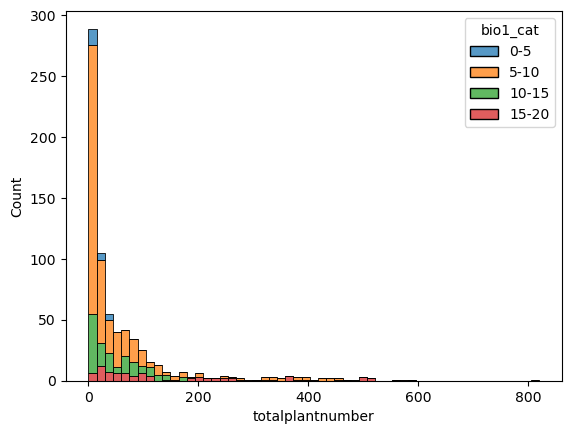

In [241]:
sns.histplot(data = census_data, x = 'totalplantnumber' , hue = 'bio1_cat',multiple="stack")

In [246]:
census_data.groupby('bio1_cat')['site'].unique()

bio1_cat
0-5                                             [58]
5-10     [55, 27, 42, 1, 52, 46, 53, 49, 23, 37, 57]
10-15              [5, 2, 45, 11, 28, 9, 33, 12, 54]
15-20                         [4, 13, 43, 32, 6, 26]
Name: site, dtype: object

In [255]:
census_data[census_data['year']== '2018'].groupby('site').size()

site
1     12
2     36
4     12
5     24
6     12
9     36
12    48
23    12
26    24
27     7
28     5
32    12
33     2
37    36
42    12
43    12
45    12
46    12
49    12
52    36
53    12
54    12
55    24
57    12
dtype: int64

<AxesSubplot:xlabel='totalplantnumber', ylabel='Count'>

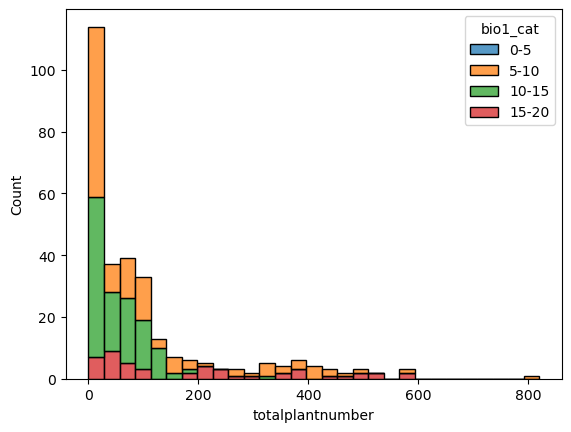

In [248]:
sns.histplot(data = census_data[census_data['year']== '2018'], x = 'totalplantnumber' , hue = 'bio1_cat',multiple="stack")

<AxesSubplot:xlabel='totalplantnumber', ylabel='Count'>

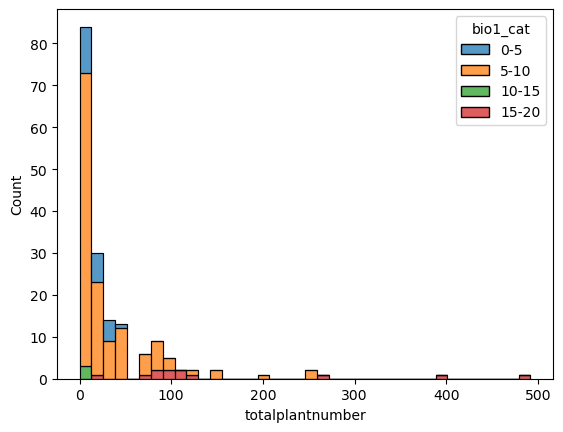

In [249]:
sns.histplot(data = census_data[census_data['year']== '2019'], x = 'totalplantnumber' , hue = 'bio1_cat',multiple="stack")

<AxesSubplot:xlabel='totalplantnumber', ylabel='Count'>

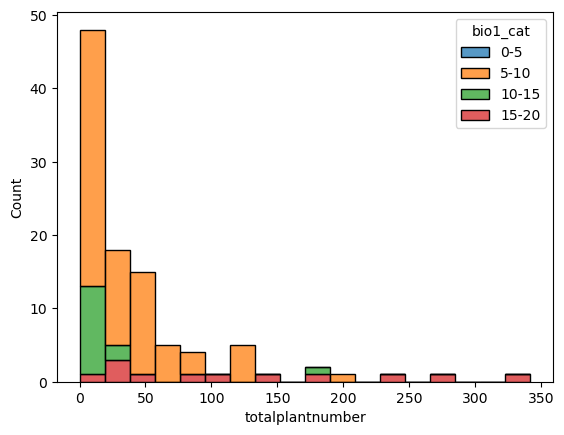

In [250]:
sns.histplot(data = census_data[census_data['year']== '2020'], x = 'totalplantnumber' , hue = 'bio1_cat',multiple="stack")

<AxesSubplot:xlabel='totalplantnumber', ylabel='Count'>

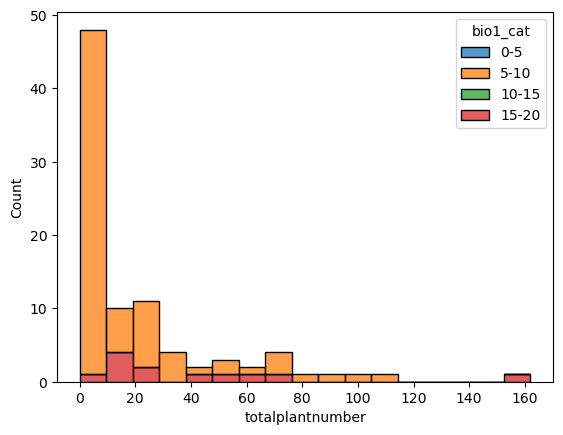

In [251]:
sns.histplot(data = census_data[census_data['year']== '2021'], x = 'totalplantnumber' , hue = 'bio1_cat',multiple="stack")

In [256]:
census_data[[]]

,site,plot,date,diagonalplantnumber,offdiagonalplantnumber,totalplantnumber,meanfruitsperplant,sdfruitsperplant,comments,censusid,year,bio1,bio1_cat
0,55,1.0,2022-04-12,NaN,NaN,0.0,NaN,NaN,NaN,55012022-04-12,2022,8.933333,5-10
1,55,2.0,2022-04-12,NaN,NaN,1.0,NaN,NaN,NaN,55022022-04-12,2022,8.933333,5-10
2,55,3.0,2022-04-12,NaN,NaN,0.0,NaN,NaN,NaN,55032022-04-12,2022,8.933333,5-10
3,55,4.0,2022-04-12,NaN,NaN,2.0,NaN,NaN,NaN,55042022-04-12,2022,8.933333,5-10
4,55,5.0,2022-04-12,NaN,NaN,2.0,NaN,NaN,NaN,55052022-04-12,2022,8.933333,5-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,57,3.0,2018-04-11,NaN,NaN,17.0,NaN,NaN,Plot_ID numbers may seem weird because other n...,57032018-04-11,2018,9.758333,5-10
1150,57,4.0,2018-04-11,NaN,NaN,18.0,NaN,NaN,Plot_ID numbers may seem weird because other n...,57042018-04-11,2018,9.758333,5-10
1151,57,6.0,2018-04-11,NaN,NaN,45.0,NaN,NaN,Plot_ID numbers may seem weird because other n...,57062018-04-11,2018,9.758333,5-10
1152,57,7.0,2018-04-11,NaN,NaN,63.0,NaN,NaN,Plot_ID numbers may seem weird because other n...,57072018-04-11,2018,9.758333,5-10


In [264]:
## based on the representation of hte diagonal of the perimeter: 
## this shuld give the total number of plants 
census_data['totalplantnumber_estim'] = census_data['diagonalplantnumber'] / 0.24

<AxesSubplot:xlabel='totalplantnumber', ylabel='Count'>

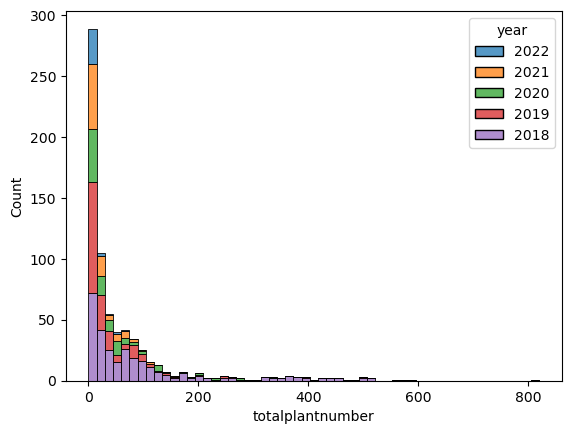

In [267]:
sns.histplot(data = census_data, x = 'totalplantnumber' , hue = 'year',multiple="stack")

<AxesSubplot:xlabel='totalplantnumber_estim', ylabel='Count'>

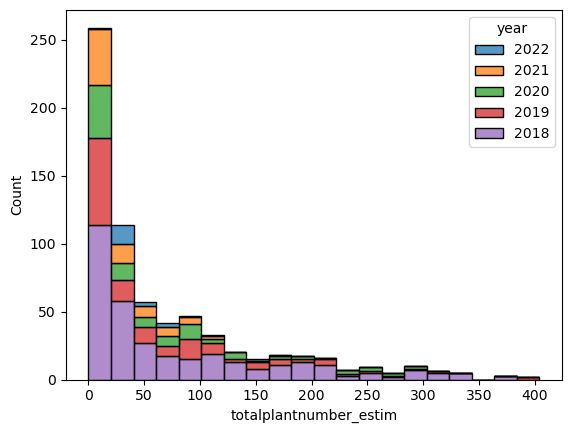

In [268]:
sns.histplot(data = census_data, x = 'totalplantnumber_estim' , hue = 'year',multiple="stack")

In [270]:
est_vs_data = census_data[(census_data['totalplantnumber'].notna()) & (census_data['totalplantnumber_estim'].notna())]

<AxesSubplot:xlabel='totalplantnumber', ylabel='totalplantnumber_estim'>

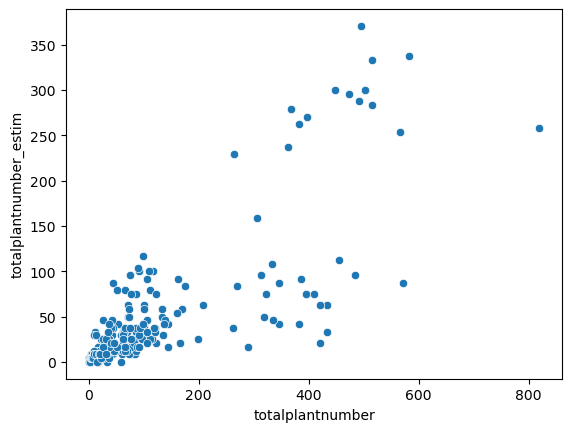

In [272]:
sns.scatterplot(data = est_vs_data, x = 'totalplantnumber', y = 'totalplantnumber_estim')

In [278]:
max_plant_number = census_data.groupby(['site', 'year'])['totalplantnumber'].max().reset_index()

In [281]:
max_plant_number

,site,year,totalplantnumber
0,1,2018,572.0
1,1,2019,145.0
2,1,2020,199.0
3,1,2021,NaN
4,2,2018,319.0
...,...,...,...
61,55,2020,55.0
62,55,2021,86.0
63,55,2022,16.0
64,57,2018,192.0


/Users/tbellagio/opt/anaconda3/envs/simulations/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/tbellagio/opt/anaconda3/envs/simulations/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/tbellagio/opt/anaconda3/envs/simulations/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/tbellagio/opt/anaconda3/envs/simulations/lib/python3.10/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_da

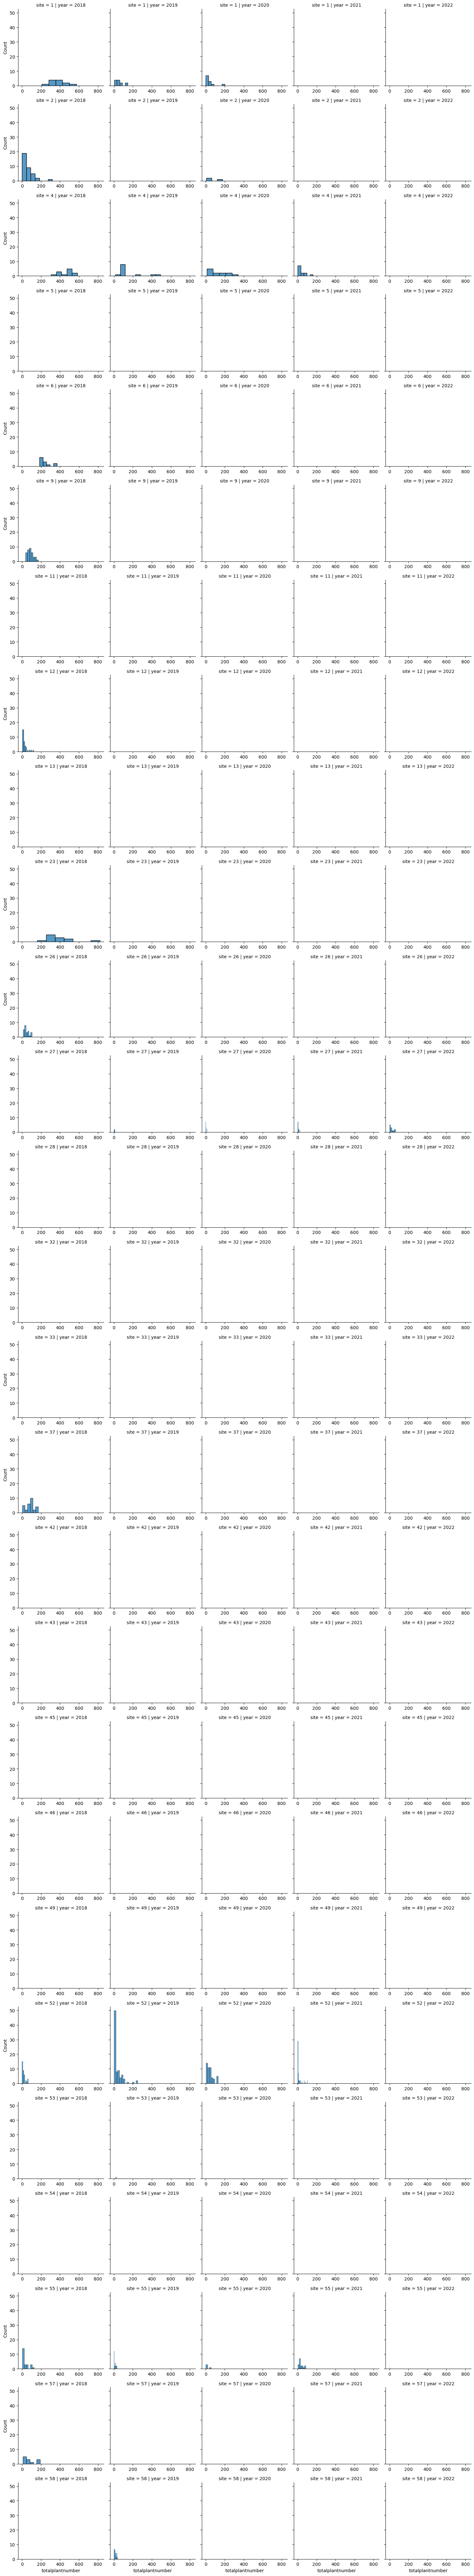

In [286]:
g = sns.FacetGrid(census_data, col="year",col_order=['2018','2019','2020', '2021', '2022'],  row="site")
for axis in g.axes.flat:
    axis.tick_params(labelbottom=True)
g.map(sns.histplot, "totalplantnumber");

In [287]:
census_data.columns

Index(['site', 'plot', 'date', 'diagonalplantnumber', 'offdiagonalplantnumber',
       'totalplantnumber', 'meanfruitsperplant', 'sdfruitsperplant',
       'comments', 'censusid', 'year', 'bio1', 'bio1_cat',
       'totalplantnumber_estim'],
      dtype='object')

<AxesSubplot:xlabel='meanfruitsperplant', ylabel='Count'>

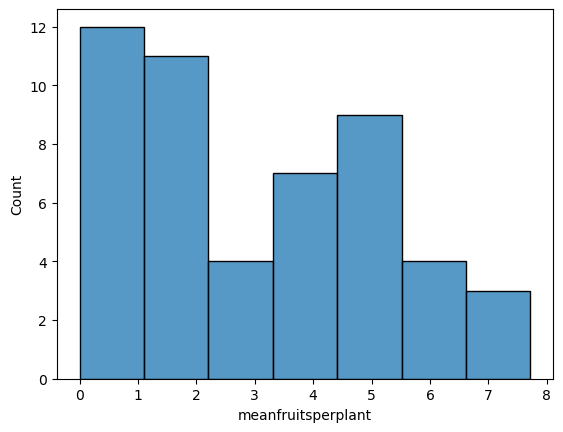

In [289]:
sns.histplot(census_data['meanfruitsperplant'])

In [291]:
census_data[census_data['meanfruitsperplant'].notnull()].groupby('site').size()

site
2      3
4     35
43    12
dtype: int64

In [294]:
census_data[census_data['meanfruitsperplant'].notnull()]['year'].unique()

array(['2021', '2019', '2018', '2020'], dtype=object)